In [14]:
!pip install scikit-image


In [15]:
import os
import cv2
import numpy as np
from tqdm import tqdm

from skimage.filters import threshold_otsu, threshold_sauvola
from sklearn.metrics import jaccard_score


In [16]:
DATA_PATH = "/kaggle/input/brain-tumor-segmentation"

images_path = os.path.join(DATA_PATH, "images")
masks_path = os.path.join(DATA_PATH, "masks")

image_list = sorted(os.listdir(images_path))
mask_list = sorted(os.listdir(masks_path))

print("Total Images:", len(image_list))


Total Images: 3064


In [17]:
def dice_score(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    intersection = np.sum((y_true == 255) & (y_pred == 255))
    return (2. * intersection) / (
        np.sum(y_true == 255) + np.sum(y_pred == 255) + 1e-8
    )


In [18]:
dice_otsu_all = []
dice_sauvola_all = []

jacc_otsu_all = []
jacc_sauvola_all = []

for img_name, mask_name in tqdm(zip(image_list, mask_list), total=len(image_list)):
    
    image = cv2.imread(os.path.join(images_path, img_name), 0)
    mask = cv2.imread(os.path.join(masks_path, mask_name), 0)
    
    # OTSU
    t_otsu = threshold_otsu(image)
    otsu_seg = (image > t_otsu).astype(np.uint8) * 255
    
    # SAUVOLA
    t_sauvola = threshold_sauvola(image, window_size=25)
    sauvola_seg = (image > t_sauvola).astype(np.uint8) * 255
    
    # Metrics
    dice_otsu_all.append(dice_score(mask, otsu_seg))
    dice_sauvola_all.append(dice_score(mask, sauvola_seg))
    
    jacc_otsu_all.append(
        jaccard_score(
            (mask.flatten() == 255),
            (otsu_seg.flatten() == 255)
        )
    )
    
    jacc_sauvola_all.append(
        jaccard_score(
            (mask.flatten() == 255),
            (sauvola_seg.flatten() == 255)
        )
    )


100%|██████████| 3064/3064 [04:47<00:00, 10.66it/s]


In [20]:

print("Otsu Dice:", np.mean(dice_otsu_all))
print("Otsu Jaccard:", np.mean(jacc_otsu_all))

print("\nSauvola Dice:", np.mean(dice_sauvola_all))
print("Sauvola Jaccard:", np.mean(jacc_sauvola_all))


Otsu Dice: 0.07074164298403321
Otsu Jaccard: 0.03764597896852798

Sauvola Dice: 0.04628172085616832
Sauvola Jaccard: 0.024083547293960055


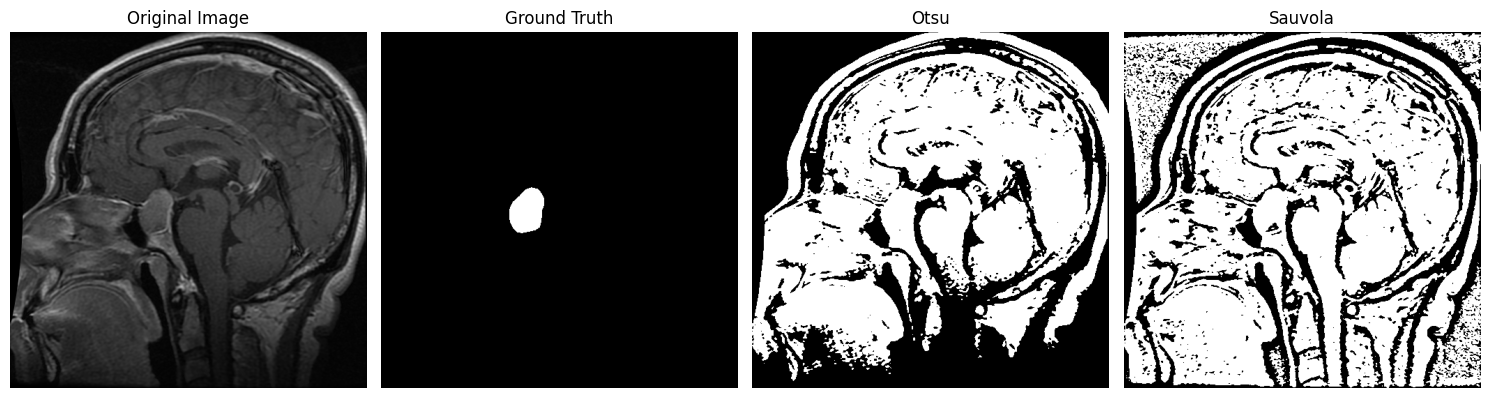

In [25]:
import matplotlib.pyplot as plt

idx = 200

image = cv2.imread(os.path.join(images_path, image_list[idx]), 0)
mask = cv2.imread(os.path.join(masks_path, mask_list[idx]), 0)

# Apply OTSU
t_otsu = threshold_otsu(image)
otsu_seg = (image > t_otsu).astype(np.uint8) * 255

# Apply SAUVOLA
t_sauvola = threshold_sauvola(image, window_size=25)
sauvola_seg = (image > t_sauvola).astype(np.uint8) * 255

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(otsu_seg, cmap='gray')
plt.title("Otsu")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(sauvola_seg, cmap='gray')
plt.title("Sauvola")
plt.axis("off")

plt.tight_layout()
plt.show()
